# Проект "Аналитика эффективности маркетинга НКО Благотворительная Больница"

## Описание проекта

"Благотворительная больница" оказывает медико-социальную помощь бездомным людям в Санкт-Петербурге с 2018 года.

**Цель проекта** - проанализировать эффективность маркетингового подхода на основе данных о пожертвованиях и рекламных кампаниях.

**Задачи**:

1. Предобработка данных:
    * Загрузка и изучение данных
    * Переименование столбцов
    * Удаление лишних или пустых колонок
    * Преобразование типов данных
    * Обработка пропусков
    * Удаление дубликатов
    * Объединение данных
2. Анализ данных:
    * Клиенты
    * Конверсия
    * Анализ рекламных кампаний
3. Выводы и рекомендации
4. Подготовка презентации

Описание данных:

1. `adgrants.csv` содержит агрегированные и неагрегированные значения по рекламным кампаниям;
2. `donors.xlsx` содержит данные о пожертвованиях, которые были получены на сайте charityhospital.ru;
3. `clients.xlsx` - это данные о пожертвованиях, полученные с использованием сервиса Mixplat (из разных источников).

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go


### Загрузка данных

In [2]:
url1 = 'https://drive.usercontent.google.com/download?id=1NNy9TdohszE9R17IS-w1RuRRe7beEK7A&export=download&authuser=0&confirm=t&uuid=470f9141-6116-4b6f-8255-32d22b12d7f2&at=APZUnTVAOdITITlNnOSP699u_Ax_:1697977670639'
url2 = 'https://drive.usercontent.google.com/download?id=1XWv34uLAYS75c3iybDEgynUo6GG0kH-i&export=download&authuser=0&confirm=t&uuid=6e5e3429-fe5a-4be5-a3a1-91ab87c72daf&at=APZUnTUWS44gLJy4GwBYoEUAw6Qg:1697977703176'
url3 = 'https://drive.usercontent.google.com/download?id=1ky9GWnW2BGcPIx_6Tj86RPRTGN3YE6rB&export=download&authuser=0&confirm=t&uuid=0b3c699e-d883-4907-bc0c-eb3af5482b5e&at=APZUnTUeSBGXVQoZUkJ-tlPxURRg:1697977707274'
try:
    ads_df = pd.read_csv(url1, sep = ';', skiprows=3)
    ads_total_df = pd.read_csv(url1, delimiter=';', skiprows=lambda x: x not in [1, 2])
    donors_df = pd.read_excel(url2)
    clients_df = pd.read_excel(url3)
except Exception as e:
    print(type(e).__name__)

In [3]:
# Функция для отображения аналитической сводки по столбцам датафрейма

def dataframe_summary(df, nan_threshold=10):
    summary = pd.DataFrame(df.dtypes, columns=['column_type'])
    summary = (
        summary
        .reset_index()
        .rename(columns={'index':'column_name'})
    )
    summary['count'] = list(df.count())
    summary['unique_count'] = list(df.nunique())
    summary['nan_count'] = list(df.isna().sum())
    summary['nan_percent'] = list(df.isna().mean() * 100)
    summary['nan_percent'] = (
        summary['nan_percent'].apply(lambda x: '{:.2f}'.format(x)))

    df_summary = summary.style.background_gradient(cmap='RdYlGn_r',
                                                   subset=['nan_percent'])

    high_nan_cols = (
        summary[summary['nan_percent']
                .astype(float) > nan_threshold]['column_name'])
    print(f"Количество столбцов, где имеется больше {nan_threshold}% NaN значений:\
    {len(high_nan_cols)} \n")
    if len(high_nan_cols) != 0:
        print(f"Названия столбцов: {', '.join(high_nan_cols)} \n")

    return df_summary

1. Агрегированные значения по рекламным кампаниям за период с 19.07.2022 по 19.07.2023.

In [4]:
# Удаляем пустой столбец
ads_total_df = ads_total_df.drop(columns=['Unnamed: 1'], axis=1)

In [5]:
ads_total_df.loc[0]

Всего                                        с 19.07.2022 по 19.07.2023
Ср.расход за день (руб.)                                        5468,02
Показы                                                          9853586
Взвешенные показы                                            9853586,00
Клики                                                             41243
CTR (%)                                                            0,42
wCTR (%)                                                           0,42
Расход (руб.)                                                 825670,64
Ср. цена клика (руб.)                                             20,02
Ср. ставка за клик (руб.)                                         29,15
Ср. позиция показов                                                   -
Ср. объём трафика                                                100,00
Ср. позиция кликов                                                    -
Отказы (%)                                                      

2. Неагрегированные значения по рекламным кампаниям за указанный период.

In [6]:
dataframe_summary(ads_df)

Количество столбцов, где имеется больше 10% NaN значений:    0 



,column_name,column_type,count,unique_count,nan_count,nan_percent
0,Дата,object,308023,151,0,0.00
1,Кампания,object,308023,24,0,0.00
2,№ Кампании,int64,308023,24,0,0.00
3,Метка,object,308023,1,0,0.00
4,Условие показа,object,308023,1196,0,0.00
5,Пол,object,308023,3,0,0.00
6,Уровень платежеспособности,object,308023,4,0,0.00
7,Возраст,object,308023,7,0,0.00
8,Показы,int64,308023,2129,0,0.00
9,Взвешенные показы,object,308023,2129,0,0.00


In [7]:
ads_df.head()

,Дата,Кампания,№ Кампании,Метка,Условие показа,Пол,Уровень платежеспособности,Возраст,Показы,Взвешенные показы,...,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
0,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,не определен,7,"7,00",...,-,-,-,-,-,-,-,-,-,-
1,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,младше 18,4,"4,00",...,-,-,-,-,-,-,-,-,-,-
2,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,18-24,2,"2,00",...,-,-,-,-,-,-,-,-,-,-
3,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,25-34,1,"1,00",...,-,-,-,-,-,-,-,-,-,-
4,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,35-44,1,"1,00",...,-,-,-,-,-,-,-,-,-,-


3. Данные о пожертвованиях за указанный период.

In [8]:
dataframe_summary(donors_df)

Количество столбцов, где имеется больше 10% NaN значений:    1 

Названия столбцов: Метки донора 



,column_name,column_type,count,unique_count,nan_count,nan_percent
0,ID,int64,813,813,0,0.00
1,Тип донора,object,813,2,0,0.00
2,Дата первого пожертвования,object,795,789,18,2.21
3,Сумма первого пожертвования,float64,795,55,18,2.21
4,Кампания первого пожертвования,object,795,2,18,2.21
5,Метки донора,float64,0,0,813,100.00
6,Кампании,object,795,3,18,2.21
7,Платёжные операторы,object,795,4,18,2.21
8,Дата последнего пожертвования,object,795,788,18,2.21
9,Сумма последнего пожертвования,float64,795,54,18,2.21


In [9]:
donors_df.head()

,ID,Тип донора,Дата первого пожертвования,Сумма первого пожертвования,Кампания первого пожертвования,Метки донора,Кампании,Платёжные операторы,Дата последнего пожертвования,Сумма последнего пожертвования,Кампания последнего пожертвования,Общая сумма пожертвований,Валюта,Код
0,833,разовый,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,"20.06.2023, 16:36",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 16:40",500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,100,₽,2289


4. Данные о подписках за указанный период.

In [10]:
dataframe_summary(clients_df)

Количество столбцов, где имеется больше 10% NaN значений:    3 

Названия столбцов: Типы оплаты, Страны, Регионы 



,column_name,column_type,count,unique_count,nan_count,nan_percent
0,id,int64,1166,1166,0,0.00
1,Первый платеж,datetime64[ns],1166,1166,0,0.00
2,Подписки вкл,int64,1166,3,0,0.00
3,Подписки выкл,int64,1166,6,0,0.00
4,Типы оплаты,object,998,7,168,14.41
5,Платежей за год,int64,1166,17,0,0.00
6,Сумма за год,int64,1166,110,0,0.00
7,Средний платеж в год,object,1166,117,0,0.00
8,Всего платежей,int64,1166,23,0,0.00
9,Сумма всего,int64,1166,120,0,0.00


In [11]:
clients_df.head()

,id,Первый платеж,Подписки вкл,Подписки выкл,Типы оплаты,Платежей за год,Сумма за год,Средний платеж в год,Всего платежей,Сумма всего,Средний платеж,Сумма за месяц,Страны,Регионы,Последний платеж,код
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,500,1,500,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122


### Переименование столбцов

1. Переименуем столбы таблицы ads_total_df, где содержатся агрегированные значения по рекламным кампаниям.

In [12]:
translated_columns = [
    'total',
    'avg_daily_cost_rub',
    'impressions',
    'weighted_impressions',
    'clicks',
    'ctr_percentage',
    'weighted_ctr_percentage',
    'cost_rub',
    'avg_click_cost_rub',
    'avg_click_rate_rub',
    'avg_position_impressions',
    'avg_traffic_volume',
    'avg_position_clicks',
    'bounce_rate_percentage',
    'avg_cost_per_thousand_impressions_rub',
    'depth_pages',
    'conversion_percentage',
    'conversion_cost_rub',
    'conversions',
    'profitability',
    'ad_expense_share',
    'revenue_rub',
    'profit_rub',
    'total_vc',
    'vc_cost_rub',
    'vc_share_percentage',
    'video_play_25_percentage',
    'video_play_50_percentage',
    'video_play_75_percentage',
    'video_play_100_percentage',
    'video_play_25_share_percentage',
    'video_play_50_share_percentage',
    'video_play_75_share_percentage',
    'video_play_100_share_percentage',
    'avg_video_view_100_cost_rub',
    'visible_impressions_standard_mrc',
    'invisible_impressions_standard_mrc',
    'unmeasured_impressions_standard_mrc',
    'measured_impressions_share_standard_mrc_percentage',
    'visible_impressions_share_standard_mrc_percentage'
]

ads_total_df.columns = translated_columns

In [13]:
ads_total_df

,total,avg_daily_cost_rub,impressions,weighted_impressions,clicks,ctr_percentage,weighted_ctr_percentage,cost_rub,avg_click_cost_rub,avg_click_rate_rub,...,video_play_25_share_percentage,video_play_50_share_percentage,video_play_75_share_percentage,video_play_100_share_percentage,avg_video_view_100_cost_rub,visible_impressions_standard_mrc,invisible_impressions_standard_mrc,unmeasured_impressions_standard_mrc,measured_impressions_share_standard_mrc_percentage,visible_impressions_share_standard_mrc_percentage
0,с 19.07.2022 по 19.07.2023,"5468,02",9853586,"9853586,00",41243,"0,42","0,42","825670,64","20,02","29,15",...,"1,19","0,85","0,71","0,64","13,1169",7348,11157,0,"100,00","39,71"


2. Переименуем столбы таблицы ads_df, где содержатся неагрегированные значения по рекламным кампаниям за указанный период.

In [14]:
translated_columns_ads_df = [
    'date',
    'campaign',
    'campaign_number',
    'label',
    'display_condition',
    'gender',
    'payment_ability_level',
    'age',
    'impressions',
    'weighted_impressions',
    'clicks',
    'ctr_percentage',
    'weighted_ctr_percentage',
    'cost_rub',
    'avg_click_cost_rub',
    'avg_click_rate_rub',
    'avg_position_impressions',
    'avg_traffic_volume',
    'avg_position_clicks',
    'bounce_rate_percentage',
    'avg_cost_per_thousand_impressions_rub',
    'depth_pages',
    'conversion_percentage',
    'conversion_cost_rub',
    'conversions',
    'profitability',
    'ad_expense_share',
    'revenue_rub',
    'profit_rub',
    'total_vc',
    'vc_cost_rub',
    'vc_share_percentage',
    'video_play_25_percentage',
    'video_play_50_percentage',
    'video_play_75_percentage',
    'video_play_100_percentage',
    'video_play_25_share_percentage',
    'video_play_50_share_percentage',
    'video_play_75_share_percentage',
    'video_play_100_share_percentage',
    'avg_video_view_100_cost_rub',
    'visible_impressions_standard_mrc',
    'invisible_impressions_standard_mrc',
    'unmeasured_impressions_standard_mrc',
    'measured_impressions_share_standard_mrc_percentage',
    'visible_impressions_share_standard_mrc_percentage'
]
ads_df.columns = translated_columns_ads_df

In [15]:
ads_df

,date,campaign,campaign_number,label,display_condition,gender,payment_ability_level,age,impressions,weighted_impressions,...,video_play_25_share_percentage,video_play_50_share_percentage,video_play_75_share_percentage,video_play_100_share_percentage,avg_video_view_100_cost_rub,visible_impressions_standard_mrc,invisible_impressions_standard_mrc,unmeasured_impressions_standard_mrc,measured_impressions_share_standard_mrc_percentage,visible_impressions_share_standard_mrc_percentage
0,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,не определен,7,"7,00",...,-,-,-,-,-,-,-,-,-,-
1,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,младше 18,4,"4,00",...,-,-,-,-,-,-,-,-,-,-
2,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,18-24,2,"2,00",...,-,-,-,-,-,-,-,-,-,-
3,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,25-34,1,"1,00",...,-,-,-,-,-,-,-,-,-,-
4,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,35-44,1,"1,00",...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308018,19.07.2023,РК_Общий сбор_средств,89800500,без метки,'---autotargeting,женский,2-5%,25-34,2,"2,00",...,-,-,-,-,-,-,-,-,-,-
308019,19.07.2023,РК_Общий сбор_средств,89800500,без метки,'---autotargeting,женский,2-5%,35-44,3,"3,00",...,-,-,-,-,-,-,-,-,-,-
308020,19.07.2023,РК_Общий сбор_средств,89800500,без метки,'---autotargeting,женский,2-5%,45-54,1,"1,00",...,-,-,-,-,-,-,-,-,-,-
308021,19.07.2023,РК_Общий сбор_средств,89800500,без метки,'---autotargeting,женский,2-5%,старше 55,1,"1,00",...,-,-,-,-,-,-,-,-,-,-


In [16]:
# Удаление лишнего столбца
ads_df = ads_df.drop('label', axis=1)

3. Переименуем столбцы таблицы clients_df с данными о пожертвованиях за указанный период.

In [17]:
translated_columns_clients_df = [
    'id',
    'first_payment',
    'subscriptions_on',
    'subscriptions_off',
    'payment_types',
    'payments_per_year',
    'yearly_total_amount',
    'avg_yearly_payment',
    'total_payments',
    'total_amount',
    'avg_payment',
    'monthly_amount',
    'countries',
    'regions',
    'last_payment',
    'code'
]
clients_df.columns = translated_columns_clients_df

In [18]:
clients_df.head()

,id,first_payment,subscriptions_on,subscriptions_off,payment_types,payments_per_year,yearly_total_amount,avg_yearly_payment,total_payments,total_amount,avg_payment,monthly_amount,countries,regions,last_payment,code
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,500,1,500,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122


4. Переименуем столбцы таблицы donors_df, которая содержит данные о подписках за указанный период.

In [19]:
translated_columns_donors_df = [
    'id',
    'donor_type',
    'first_donation_date',
    'first_donation_amount',
    'first_donation_campaign',
    'donor_labels',
    'campaigns',
    'payment_operators',
    'last_donation_date',
    'last_donation_amount',
    'last_donation_campaign',
    'total_donation_amount',
    'currency',
    'code'
]
donors_df.columns = translated_columns_donors_df

In [20]:
donors_df.head()

,id,donor_type,first_donation_date,first_donation_amount,first_donation_campaign,donor_labels,campaigns,payment_operators,last_donation_date,last_donation_amount,last_donation_campaign,total_donation_amount,currency,code
0,833,разовый,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,"20.06.2023, 16:36",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 16:40",500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,100,₽,2289


In [21]:
# Удаление лишнего столбца
donors_df = donors_df.drop('donor_labels', axis=1)

### Преобразование типов данных

In [22]:
# Включаем показ дополнительных столбцов
pd.set_option('display.max_columns', None)

# Выключаем показ дополнительных столбцов
# pd.reset_option('display.max_columns')

1. Преобразуем типы данных в таблице ads_df.

Теперь заменим типы данных в необходимых столбцах на числовые.

In [23]:
col2 = ['ctr_percentage',
    'weighted_ctr_percentage',
    'cost_rub',
    'avg_click_cost_rub',
    'avg_click_rate_rub',
    'avg_position_impressions',
    'avg_traffic_volume',
    'avg_position_clicks',
    'bounce_rate_percentage',
    'avg_cost_per_thousand_impressions_rub',
    'depth_pages',
    'conversion_percentage',
    'conversion_cost_rub',
    'conversions',
    'profitability',
    'ad_expense_share',
    'revenue_rub',
    'profit_rub',
    'total_vc',
    'vc_cost_rub',
    'vc_share_percentage',
    'video_play_25_percentage',
    'video_play_50_percentage',
    'video_play_75_percentage',
    'video_play_100_percentage',
    'video_play_25_share_percentage',
    'video_play_50_share_percentage',
    'video_play_75_share_percentage',
    'video_play_100_share_percentage',
    'avg_video_view_100_cost_rub',
    'visible_impressions_standard_mrc',
    'invisible_impressions_standard_mrc',
    'unmeasured_impressions_standard_mrc',
    'measured_impressions_share_standard_mrc_percentage',
    'visible_impressions_share_standard_mrc_percentage']

for col in col2:
    ads_df[col] = pd.to_numeric(ads_df[col], errors='coerce')

Теперь исправим тип данных в столбце времени.

In [24]:
ads_df['date'] = pd.to_datetime(ads_df['date'], format='%d.%m.%Y')

In [25]:
print(f"Первая рекламная кампания: {ads_df['date'].min()}")
print(f"Последняя рекламная кампания: {ads_df['date'].max()}")
print(f"Всего доступны данные за {(ads_df['date'].max()-ads_df['date'].min()).days} дн.")

Первая рекламная кампания: 2023-01-15 00:00:00
Последняя рекламная кампания: 2023-07-19 00:00:00
Всего доступны данные за 185 дн.


Стоит отметить, что данные о датах не совпадают с агрегированными данными (ads_df_total), которые были получены из того же файла: агрегированные данные представлены за период с 19.07.2022 по 19.07.2023, а построчные за период с 15.01.2023 по 19.07.2023. Иными словами, соединить их без ошибок в расчетах не получится.

2. Преобразуем типы данных в таблице donors_df.

В данном случае требуется обработать только столбцы со временем.

In [26]:
donors_df['first_donation_date'] = \
(pd.to_datetime(donors_df['first_donation_date'],
                format='%d.%m.%Y, %H:%M'))

donors_df['last_donation_date'] = \
(pd.to_datetime(donors_df['last_donation_date'],
                format='%d.%m.%Y, %H:%M'))

In [27]:
print(f"Самое ранее последнее пожертвование: {donors_df['last_donation_date'].min()}")
print(f"Самое позднее последнее пожертвование: {donors_df['last_donation_date'].max()}")
print(f"Всего доступны данные за \
{(donors_df['last_donation_date'].max()-donors_df['last_donation_date'].min()).days} дн.")

Самое ранее последнее пожертвование: 2022-08-18 14:38:00
Самое позднее последнее пожертвование: 2023-06-24 00:16:00
Всего доступны данные за 309 дн.


In [28]:
donors_df[['first_donation_date', 'last_donation_date']].head()

,first_donation_date,last_donation_date
0,2023-06-21 18:43:00,2023-06-21 18:43:00
1,2023-06-20 16:36:00,2023-06-20 16:40:00
2,2023-06-20 10:39:00,2023-06-20 10:39:00
3,2023-06-20 09:09:00,2023-06-20 09:09:00
4,2023-06-19 23:03:00,2023-06-19 23:03:00


Видно, что время между первым и последним пожертвованием незначительно отличается даже в ситуации, когда это и один и тот же платеж.

3. Преобразуем типы данных в таблице clients_df.

In [29]:
clients_df['avg_yearly_payment'] = (
    pd.to_numeric(clients_df['avg_yearly_payment'], errors='coerce')
)
clients_df['avg_payment'] = (
    pd.to_numeric(clients_df['avg_payment'], errors='coerce')
)

### Столбцы датафрейма ads_df

В случае с ads_df мы имеем множество столбцов, которые не имеют содержания, поскольку в них стоит '-' (по сути np.NaN). Оставим только наиболее полные данные.

In [30]:
columns_to_keep = ['date',
                   'campaign',
                   'campaign_number',
                   'display_condition',
                   'gender',
                   'payment_ability_level',
                   'age',
                   'impressions',
                   'clicks',
                   'conversions']

ads_df = ads_df[columns_to_keep]

In [31]:
ads_df.head()

,date,campaign,campaign_number,display_condition,gender,payment_ability_level,age,impressions,clicks,conversions
0,2023-01-15,Команда#2 / Бот / СПб,82164908,благотворительность,не определен,Остальные,не определен,7,0,NaN
1,2023-01-15,Команда#2 / Бот / СПб,82164908,благотворительность,не определен,Остальные,младше 18,4,0,NaN
2,2023-01-15,Команда#2 / Бот / СПб,82164908,благотворительность,не определен,Остальные,18-24,2,0,NaN
3,2023-01-15,Команда#2 / Бот / СПб,82164908,благотворительность,не определен,Остальные,25-34,1,0,NaN
4,2023-01-15,Команда#2 / Бот / СПб,82164908,благотворительность,не определен,Остальные,35-44,1,0,NaN


### Столбцы датафрейма donors_df

In [32]:
donors_df.head()

,id,donor_type,first_donation_date,first_donation_amount,first_donation_campaign,campaigns,payment_operators,last_donation_date,last_donation_amount,last_donation_campaign,total_donation_amount,currency,code
0,833,разовый,2023-06-21 18:43:00,3000.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,2023-06-21 18:43:00,3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,2023-06-20 16:36:00,500.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,2023-06-20 16:40:00,500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,2023-06-20 10:39:00,500.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,2023-06-20 10:39:00,500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,2023-06-20 09:09:00,1000.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,2023-06-20 09:09:00,1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,2023-06-19 23:03:00,100.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,2023-06-19 23:03:00,100.0,На уставную деятельность и содержание организации,100,₽,2289


In [33]:
donors_df['donor_type'].value_counts()

разовый       666
постоянный    147
Name: donor_type, dtype: int64

In [34]:
donors_df['campaigns'].value_counts()

На уставную деятельность и содержание организации                     791
#Больничкабежит                                                         3
#Больничкабежит, На уставную деятельность и содержание организации      1
Name: campaigns, dtype: int64

### Столбцы датафрейма clients_df

Посмотрим на payment_types.

In [35]:
clients_df['payment_types'].value_counts()

карта                 714
терм,СБП              198
карта,терм,СБП         59
sms,карта              11
sms                    11
sms,карта,терм,СБП      3
sms,терм,СБП            2
Name: payment_types, dtype: int64

In [36]:
print('Оплата по карте:',
      clients_df['payment_types'].str.contains('карта').value_counts()[0])
print('Оплата в терминале:',
      clients_df['payment_types'].str.contains('терм').value_counts()[1])
print('Оплата по СБП:',
      clients_df['payment_types'].str.contains('СБП').value_counts()[1])
print('Оплата по SMS:',
      clients_df['payment_types'].str.contains('sms').value_counts()[1])


Оплата по карте: 787
Оплата в терминале: 262
Оплата по СБП: 262
Оплата по SMS: 27


Здесь есть пересекающиеся значения, но нам достаточно того, что картой оплачивают пожертвования чаще других методов, терминалом и СБП примерно поровну, а СМС отходит на последний план.

Разобъем страны и регионы на элементы, поскольку в таблице их количество не всегда равно единице.

In [37]:
clients_df['countries']

0                      NaN
1                      NaN
2                      NaN
3                   Россия
4                   Россия
               ...        
1161               Франция
1162    Нидерланды\nРоссия
1163                Россия
1164            Нидерланды
1165                Россия
Name: countries, Length: 1166, dtype: object

In [38]:
clients_df['countries'].tail(20)

1146                Россия
1147                Россия
1148                   США
1149                   NaN
1150           Россия\nСША
1151                Россия
1152                Россия
1153                Россия
1154                   NaN
1155                Россия
1156                Россия
1157                Россия
1158                Россия
1159                Россия
1160                   NaN
1161               Франция
1162    Нидерланды\nРоссия
1163                Россия
1164            Нидерланды
1165                Россия
Name: countries, dtype: object

In [39]:
# Функция для разделения элементов строки
# На верхнем уровне применяет преобразованные значения к столбцу

def process_column(column, delimiter='\n'):
    def convert_to_string(row):
        # Если строка, то разделяет на элементы по знаку, тем самым удаляя его
        # Затем объединяет, если значение не NaN
        if isinstance(row, str):
            split_values = row.split(delimiter)
            return ', '.join([str(value) if not pd.isna(value) else '' for value in split_values])
        else:
            return np.NaN

    column = column.apply(convert_to_string)
    return column

In [40]:
clients_df['countries'] = process_column(clients_df['countries'])
clients_df['regions'] = process_column(clients_df['regions'])

In [41]:
clients_df['countries'].value_counts()

Россия            702
Россия, США        46
Германия           16
Нидерланды         14
Швеция             12
                 ... 
Монголия            1
США, Финляндия      1
США, Турция         1
США, Эстония        1
США, Швеция         1
Name: countries, Length: 64, dtype: int64

In [42]:
clients_df['regions'].value_counts()

Санкт-Петербург                  183
Ленинградская обл.                78
Кунене                            77
Cuando Cubango                    53
Московская обл.                   41
                                ... 
Западно-Казахстанская область      1
Карелия                            1
Кундуз, Ставропольский край        1
Кунене, Коми                       1
Бургундия — Франш-Конте            1
Name: regions, Length: 213, dtype: int64

### Дубликаты


In [43]:
ads_df.duplicated().sum()

32

In [44]:
donors_df.duplicated().sum()

0

In [45]:
clients_df.duplicated().sum()

0

In [46]:
ads_df = ads_df.drop_duplicates(inplace=False)

### Объединение данных

Следует посмотреть на связь между таблицами donors_df и clients_df, чтобы избежать задваивания жертвователей. У нас есть колонки с первым пожертвованием и кодовым идентификатором, по которым можно осуществить слияние.

Подготовим значения времени: оставим только день c часами, поскольку на уровне минут были замечены колебания.

In [47]:
clients_df['first_payment_day'] = (
    clients_df['first_payment']
    .apply(lambda x: x.strftime('%Y-%m-%d %H'))
)
clients_df['last_payment_day'] = (
    clients_df['last_payment']
    .apply(lambda x: x.strftime('%Y-%m-%d %H'))
)

In [48]:
donors_df = donors_df.dropna(subset=['first_donation_date', 'last_donation_date'], inplace=False)

In [49]:
donors_df['first_donation_day'] = (
  donors_df['first_donation_date']
  .apply(lambda x: x.strftime('%Y-%m-%d %H'))
)
donors_df['last_donation_day'] = (
  donors_df['last_donation_date']
  .apply(lambda x: x.strftime('%Y-%m-%d %H'))
)

<ipython-input-49-9d99bd9425fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donors_df['first_donation_day'] = (
<ipython-input-49-9d99bd9425fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donors_df['last_donation_day'] = (


In [50]:
merged_df = pd.merge(
    clients_df,
    donors_df,
    left_on=['first_payment_day', 'code'],
    right_on=['first_donation_day', 'code'],
    how='inner')

In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_x                     395 non-null    int64         
 1   first_payment            395 non-null    datetime64[ns]
 2   subscriptions_on         395 non-null    int64         
 3   subscriptions_off        395 non-null    int64         
 4   payment_types            375 non-null    object        
 5   payments_per_year        395 non-null    int64         
 6   yearly_total_amount      395 non-null    int64         
 7   avg_yearly_payment       394 non-null    float64       
 8   total_payments           395 non-null    int64         
 9   total_amount             395 non-null    int64         
 10  avg_payment              394 non-null    float64       
 11  monthly_amount           395 non-null    int64         
 12  countries                390 non-nul

In [52]:
merged_df.duplicated().sum()

0

### Выводы по предобработке

* Столбцы были переименованы, технические столбцы удалены;
* Данные преобразованы по типам согласно содержанию;
* Обработаны "заглушки" для пропусков в таблице ads_df, там же удалены столбцы с множественными пропусками, удалены дубликаты;
* Обработаны столбцы со странами и регионами в таблице clients_df;
* Данные двух таблиц о клиентах (donors_df и clients_df) объединены в таблицу merged_df.


## Исследовательский анализ данных

### Клиенты

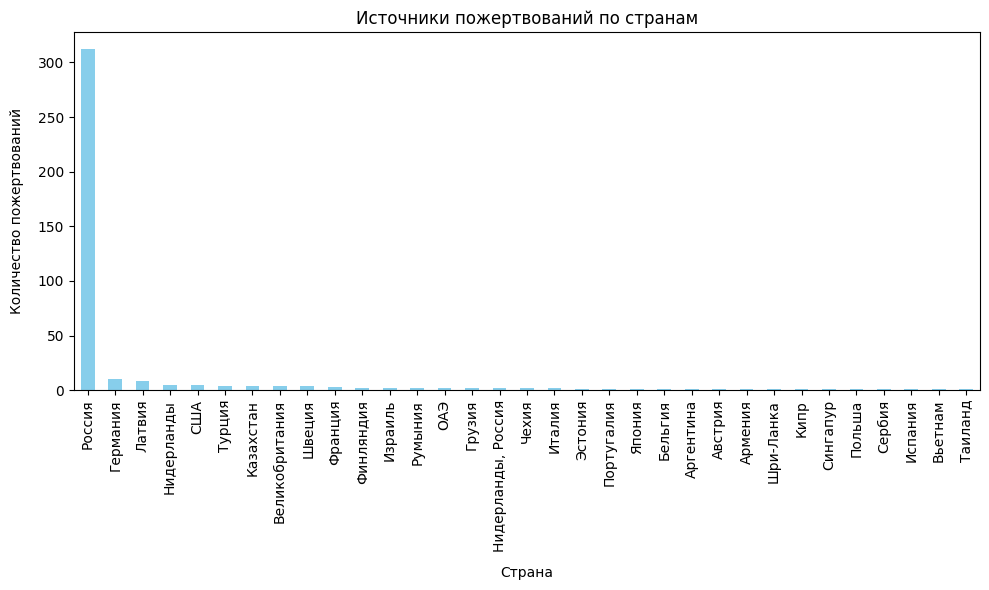

In [53]:
country_counts = merged_df['countries'].value_counts()

country_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Источники пожертвований по странам')
plt.xlabel('Страна', labelpad=10)
plt.ylabel('Количество пожертвований', labelpad=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

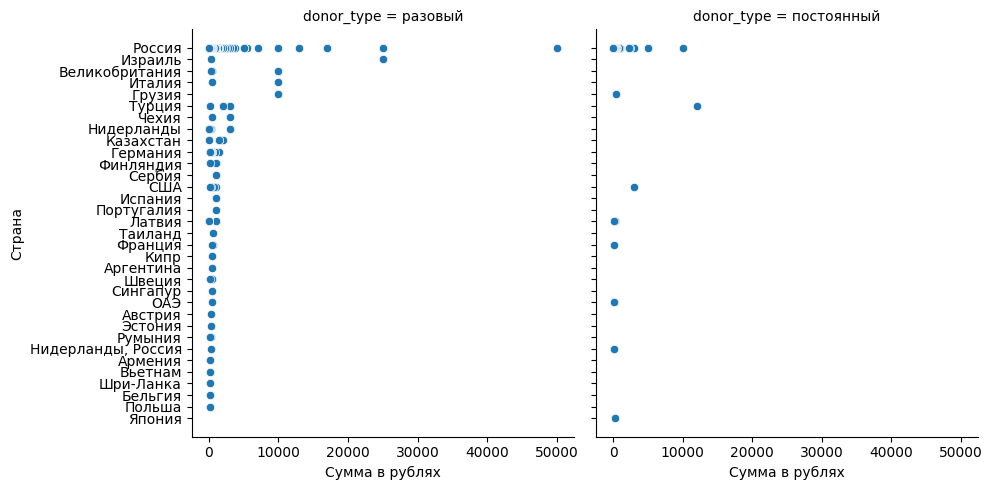

In [54]:
ax = sns.relplot(
    x='total_amount',
    y='countries',
    data=merged_df.sort_values('total_amount', ascending=False),
    kind='scatter',
    col='donor_type')

ax.set(xlabel='Сумма в рублях', ylabel='Страна')
plt.show()

В разрезе типа доноров мы видим две вещи:
1. Количество постоянных жертвователей приходится на меньшее количество стран;
2. Размер разовых пожертвований стабильно чуть выше, чем постоянных.

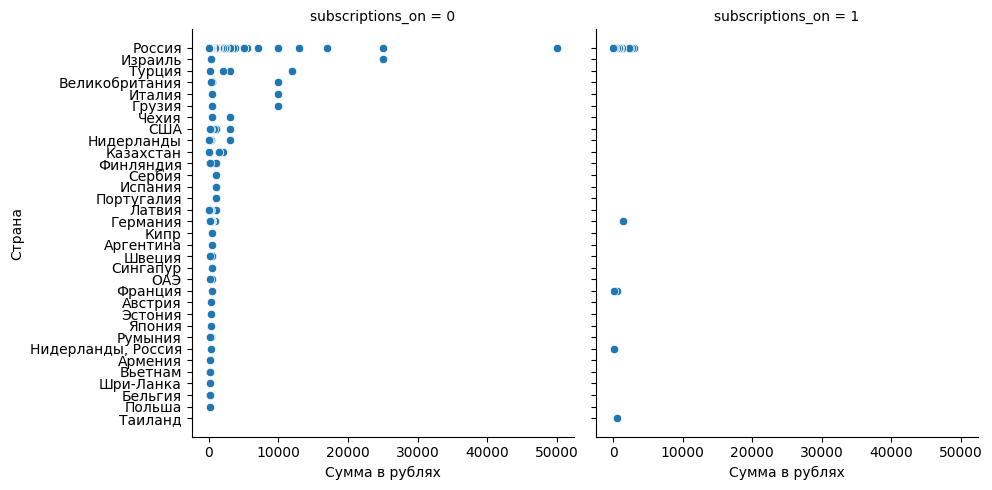

In [55]:
ax = sns.relplot(
    x='total_amount',
    y='countries',
    data=merged_df.sort_values('total_amount', ascending=False),
    kind='scatter',
    col='subscriptions_on')

ax.set(xlabel='Сумма в рублях', ylabel='Страна')
plt.show()

Интересно, что стран среди подписок отображается меньше, чем среди постоянных жертвователей. Возможно, постоянный не означает имеющий подписки.

In [56]:
merged_df['avg_payment'].describe()

count      394.000000
mean      1106.310736
std       3266.820285
min         10.000000
25%        300.000000
50%        450.000000
75%       1000.000000
max      50000.000000
Name: avg_payment, dtype: float64

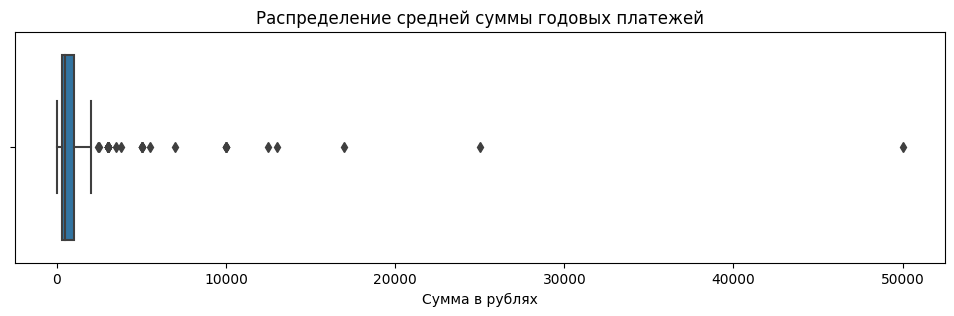

In [57]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=merged_df, x='avg_yearly_payment', orient='h')
plt.title('Распределение средней суммы годовых платежей')
plt.xlabel('Сумма в рублях')
plt.show()

Мы наблюдаем выбросы, которые сдвигают распределение вправо. Приблизим тот срез данных, где расположено наибольшее число платежей.

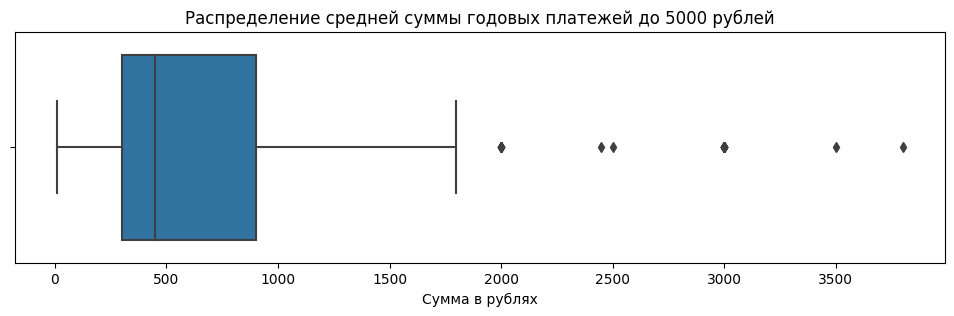

In [58]:
filtered_data = merged_df.query('avg_yearly_payment < 5000')

plt.figure(figsize=(12, 3))
sns.boxplot(data=filtered_data, x='avg_yearly_payment', orient='h')
plt.title('Распределение средней суммы годовых платежей до 5000 рублей')
plt.xlabel('Сумма в рублях')
plt.show()

Медиана расположена в районе 500 рублей, 75% платежей не переступают порог в 1000 рублей.

In [59]:
merged_df['last_payment'] = pd.to_datetime(merged_df['last_payment'])
merged_df['month'] = merged_df['last_payment'].dt.month
merged_df['year'] = merged_df['last_payment'].dt.year
merged_df['date'] = pd.to_datetime(merged_df[['year', 'month']].assign(DAY=1))
a = (
    merged_df
    .groupby('date')
    .agg({'total_payments':'sum'})
    .reset_index()
    .sort_values('date')
)
a

,date,total_payments
0,2022-08-01,4
1,2022-09-01,18
2,2022-10-01,33
3,2022-11-01,27
4,2022-12-01,60
5,2023-01-01,52
6,2023-02-01,49
7,2023-03-01,85
8,2023-04-01,67
9,2023-05-01,100


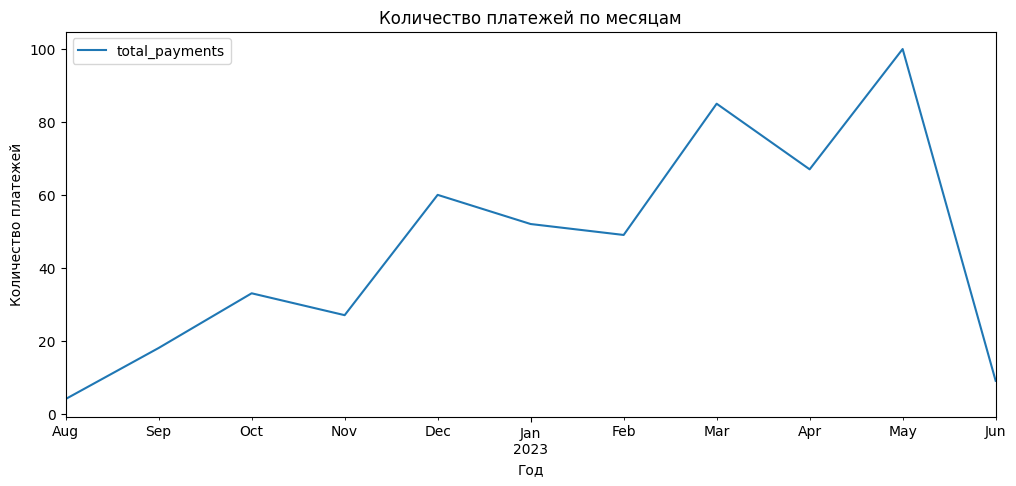

In [60]:
a.plot(
    kind='line',
    figsize=(12, 5),
    title='Количество платежей по месяцам',
    x='date',
    y='total_payments')
plt.xlabel('Год')
plt.ylabel('Количество платежей')
plt.show()

Количество платежей стабильно растет на протяжении выделенного периода с конца 2022 года и по лето 2023 года.

### Анализ рекламных кампаний

Оставим только те случаи, когда показ объявления привел к желаемому действию.

In [61]:
temp_df = ads_df[~ads_df['conversions'].isna()].copy()

In [62]:
temp_df.head()

,date,campaign,campaign_number,display_condition,gender,payment_ability_level,age,impressions,clicks,conversions
45749,2023-03-14,Гео,84199193,запись +к бесплатному врачу спб,мужской,Остальные,25-34,47,1,1.0
140520,2023-03-26,Пакет_Бездомашний очаг_Психологическая помощь_...,84171252,психиатрия помощь,женский,Остальные,45-54,73,1,2.0
150189,2023-04-07,Пакет_Бездомашний очаг_Реабилитационные центры...,84641858,реабилитационный центр +в городе,женский,Остальные,25-34,19,1,1.0
150490,2023-04-08,Пакет_Бездомашний очаг_Психологическая помощь_...,84171252,где найти хорошего психотерапевта,женский,Остальные,45-54,48,1,1.0
150516,2023-04-08,Пакет_Бездомашний очаг_Психологическая помощь_...,84171252,кабинет психолога,мужской,Остальные,45-54,126,1,1.0


#### Поисковые запросы

Посмотрим на условия выдачи для таких успешных кейсов.

In [63]:
temp_df['display_condition'].value_counts().head(25)

'---autotargeting                                             214
Вернулись на сайт                                              11
Работа (аффинити)                                               9
яндекс погода спб                                               6
погода спб -14 -сегодня -прогноз -яндекс -завтра -гисметео      5
погода +в ленинградской области +на неделю                      5
погода спб завтра                                               4
прогноз погоды спб -точный                                      4
погода в спб на 14                                              4
погода в лен обл                                                3
погода спб сегодня +по часам                                    3
прогноз погоды +в санкт петербурге -точный                      3
дождь +в петербурге                                             3
гисметео погода спб                                             3
погода +на день спб                                             3
погода в с

In [64]:
names = ['Автотаргетинг', 'Возвращение на сайт', 'Погода', 'Работа', 'Другое']
values = [
    temp_df[temp_df['display_condition'].str.contains('autotargeting')]['date'].count(),
    temp_df[temp_df['display_condition'].str.contains('сайт')]['date'].count(),
    temp_df[temp_df['display_condition'].str.contains('погод')]['date'].count(),
    temp_df[temp_df['display_condition'].str.contains('Работ')]['date'].count(),
    temp_df[~temp_df['display_condition'].str.contains('autotargeting')
    &~temp_df['display_condition'].str.contains('сайт')
    &~temp_df['display_condition'].str.contains('погод')
    &~temp_df['display_condition'].str.contains('Работ')]['date'].count()
  ]

In [65]:
display_condition = pd.DataFrame(
    {'display_condition': names,
     'impressions': values}
).sort_values('impressions', ascending=False)

In [66]:
display_condition

,display_condition,impressions
0,Автотаргетинг,214
4,Другое,105
2,Погода,56
1,Возвращение на сайт,12
3,Работа,9


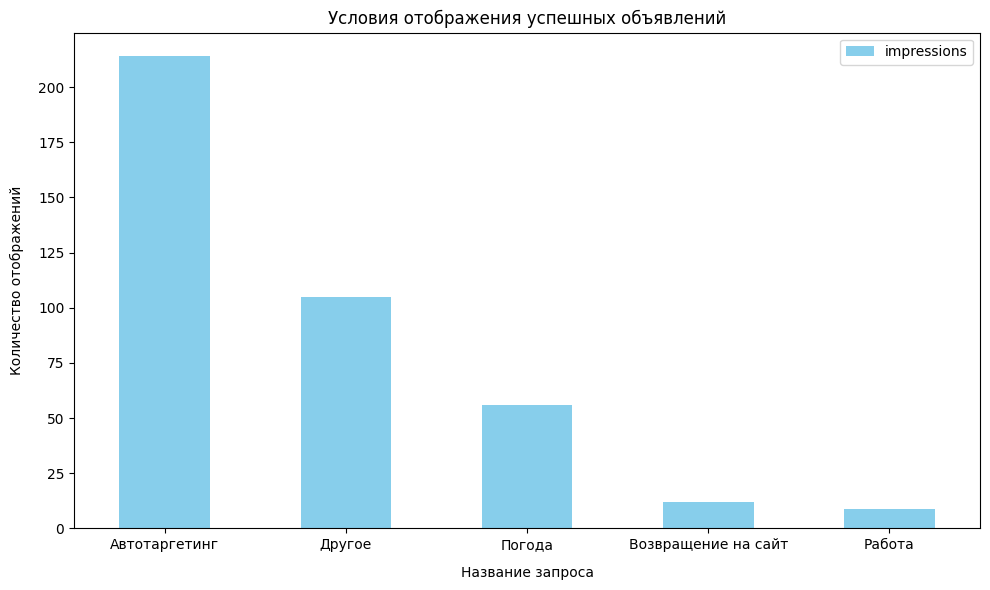

In [67]:
display_condition.plot(
    x='display_condition',
    y='impressions',
    kind='bar',
    color='skyblue',
    figsize=(10, 6))
plt.title('Условия отображения успешных объявлений')
plt.xlabel('Название запроса', labelpad=10)
plt.ylabel('Количество отображений', labelpad=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Мы видим, что автотаргентинг и погода выделяются на общем фоне.

#### Конверсия в клик по кампаниям

Чтобы посчитать конверсию, мы можем взять количество кликов за целевое действие и поделить на количество пользователей, которые посмотрели объявление.

In [68]:
temp_df['cr'] = temp_df['clicks'] / temp_df['impressions']

In [69]:
temp_df['cr'].describe()

count    396.000000
mean       0.078762
std        0.183110
min        0.000373
25%        0.004148
50%        0.013158
75%        0.057280
max        1.000000
Name: cr, dtype: float64

In [70]:
cr_campaigns = (
    temp_df
    .groupby('campaign')
    .agg({'cr':'median'})
    .reset_index()
    .sort_values('cr', ascending=False)
)
cr_campaigns['cr_percent'] = round(cr_campaigns['cr'] * 100, 2)
cr_campaigns

,campaign,cr,cr_percent
7,РК_Обустройство_клиники,0.083333,8.33
8,РК_Обустройство_клиники_путешествия,0.083333,8.33
9,РК_Общий сбор_средств,0.058824,5.88
1,Гео,0.025641,2.56
3,Пакет_Бездомашний очаг_Психологическая помощь_...,0.015873,1.59
10,РК_Ретаргетинг,0.014286,1.43
4,Пакет_Бездомашний очаг_Реабилитационные центры...,0.010330,1.03
11,РК_бездомные женщины,0.007634,0.76
0,Больничка_бизнес_ключи-интересы,0.004406,0.44
6,РК_Мобильная клиника,0.004396,0.44


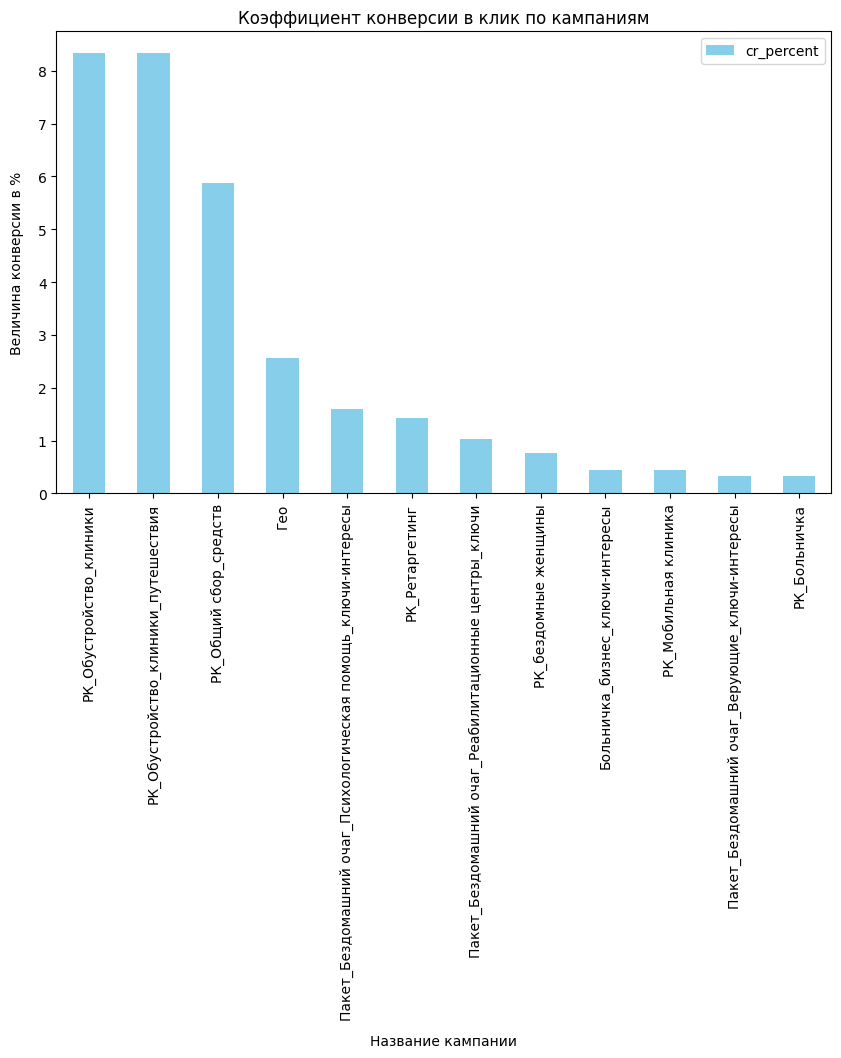

In [71]:
cr_campaigns.plot(x='campaign', y='cr_percent', kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Коэффициент конверсии в клик по кампаниям')
plt.xlabel('Название кампании', labelpad=10)
plt.ylabel('Величина конверсии в %', labelpad=10)
plt.xticks(rotation=90)
plt.show()

Итак, есть две наиболее успешные кампании с точки зрения конверсии в клик: РК_Обустройство_клиники и РК_Обустройство_клиники_путешествия (вероятно, это одна кампания, поскольку названия похожи), на третьем месте - РК_Общий_сбор_средств. Посмотрим, какое количество объявлений было показано для всех вышеуказанных кампаний.

In [72]:
temp_df2 = (
    temp_df
    .groupby('campaign')
    .agg({'impressions':'sum'})
    .reset_index()
    .sort_values('impressions', ascending=False)
)
temp_df2

,campaign,impressions
0,Больничка_бизнес_ключи-интересы,51079
5,РК_Больничка,44338
2,Пакет_Бездомашний очаг_Верующие_ключи-интересы,39408
11,РК_бездомные женщины,31419
6,РК_Мобильная клиника,22239
4,Пакет_Бездомашний очаг_Реабилитационные центры...,15463
10,РК_Ретаргетинг,14409
9,РК_Общий сбор_средств,4466
3,Пакет_Бездомашний очаг_Психологическая помощь_...,1670
7,РК_Обустройство_клиники,633


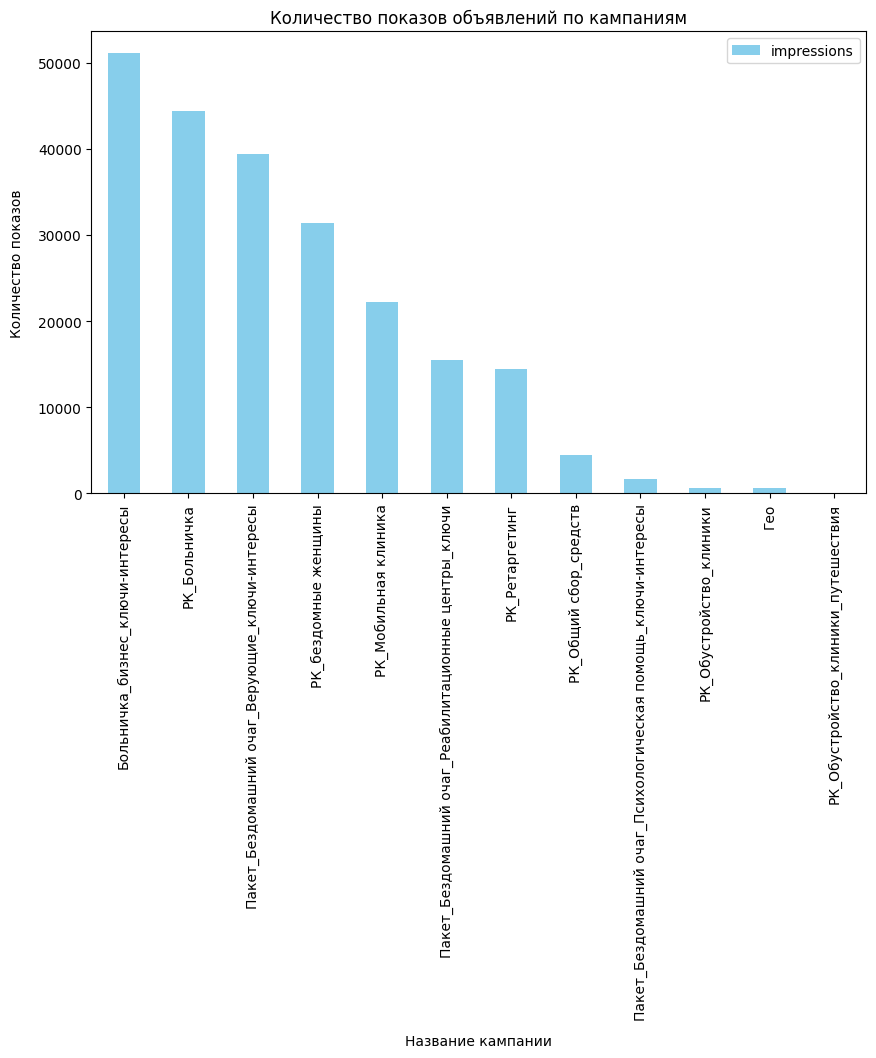

In [73]:
temp_df2.plot(x='campaign', y='impressions', kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Количество показов объявлений по кампаниям')
plt.xlabel('Название кампании', labelpad=10)
plt.ylabel('Количество показов', labelpad=10)
plt.xticks(rotation=90)
plt.show()

Отбразим полученные данные на одном графике.

In [74]:
temp_df3 = pd.merge(temp_df2, cr_campaigns)
temp_df3 = temp_df3.sort_values('cr_percent', ascending=False)
temp_df3

,campaign,impressions,cr,cr_percent
9,РК_Обустройство_клиники,633,0.083333,8.33
11,РК_Обустройство_клиники_путешествия,12,0.083333,8.33
7,РК_Общий сбор_средств,4466,0.058824,5.88
10,Гео,627,0.025641,2.56
8,Пакет_Бездомашний очаг_Психологическая помощь_...,1670,0.015873,1.59
6,РК_Ретаргетинг,14409,0.014286,1.43
5,Пакет_Бездомашний очаг_Реабилитационные центры...,15463,0.010330,1.03
3,РК_бездомные женщины,31419,0.007634,0.76
0,Больничка_бизнес_ключи-интересы,51079,0.004406,0.44
4,РК_Мобильная клиника,22239,0.004396,0.44


In [82]:
fig = px.bar(temp_df3,
             x='campaign',
             y='cr_percent',
             color='impressions',
             text='cr_percent',
             color_continuous_scale=px.colors.sequential.Redor,
             hover_name='campaign'
)
fig.update_layout(
    title='Коэффициент конверсии по кампаниям с цветовой индикацией количества объявлений',
    xaxis_title="Название кампании",
    yaxis_title="Величина конверсии в %"
)

Кампании, по которым было больше всего выдач, получили меньший коэффициент конверсий, что хорошо видно на графике. Две самые большие кампании - Больничка_бизнес_ключи-интерес и РК_Больничка имеют конверсии в 0.44% и 0.32% соответственно. Именно последние следует считать наиболее репрезентативными.

#### Возраст пользователей

Посмотрим на возраст пользователей, которые совершили целевое действие.

In [76]:
ads_df['age'].value_counts()

25-34           59446
35-44           58008
старше 55       54044
45-54           49466
18-24           44261
не определен    26542
младше 18       16224
Name: age, dtype: int64

In [77]:
b = ads_df['age'].value_counts().to_frame()

In [78]:
b['age_percent'] = round(b['age'] / b['age'].sum() * 100, 2)

In [79]:
b = b.reset_index().rename(columns={'index':'age_name'})

In [80]:
b

,age_name,age,age_percent
0,25-34,59446,19.30
1,35-44,58008,18.83
2,старше 55,54044,17.55
3,45-54,49466,16.06
4,18-24,44261,14.37
5,не определен,26542,8.62
6,младше 18,16224,5.27


In [81]:
fig = px.bar(
    b,
    x='age_name',
    y='age',
    color='age_percent',
    text=round(b['age_percent'], 2).apply(lambda x: str(x) + '%'),
    color_continuous_scale=px.colors.sequential.Redor)
fig.update_layout(title='Количество показов объявлений по возрастам',
                  xaxis_title="Возраст",
                  yaxis_title="Количество в шт.")
fig.update_traces(textfont_size=12,
                  textangle=0,
                  textposition="outside",
                  cliponaxis=False)
fig.show()

В основном представлены люди 25+. На группу до 25 лет приходится около 20%.

### Выводы по анализу данных

Анализ клиентов (по данным таблицы merged_df):
* Определены источники пожертвований по странам;
* Показаны различия сумм пожертвований в разрезе типов клиентов (постоянные и разовые), в разрезе наличия подписки;
* Показано распределение средней суммы годовых платежей на пользователя. Медиана находится в районе 500 рублей, но есть выбросы;
*  Показано количество платежей за последний год по месяцам;

Анализ рекламных кампаний (по данным ads_df):
* Отобраны объявления, по которым были совершены целевые действия;
* Определены наиболее удачные поисковые запросы: автотаргентинг, погода;
* Показаны коэффициенты конверсии по кампаниям, причем у наиболее крупных кампаний этот коэффициент ниже, чем у других. В целом, разброс идет от 0.3% до 8%;
* Определен возраст пользователей, которые переходили по объявлениям: больше всего их в категории 55+.

## Презентация с результатами

Итоговая [презентация](https://drive.google.com/file/d/1U__MZesNtCVu3gmZ2T3qVIbSK7O0ojXG/view?usp=drive_link) в формате pdf.